We're going to be calculating lexical diversity here. Most of this is pretty self explanatory, at least mathematically speaking. Computationally, this will differ in that we'll now tokenize on the level of words, not sentences.

In [4]:
%matplotlib inline
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import glob
import numpy as np
import numpy.linalg
import string # a new one
import book
from scipy.interpolate import interp1d
plt.style.use('seaborn-white')

In [5]:
# read in all the novels in the postmodern corpus
postmodern = []

for filename in glob.glob('postmodern/*.txt'):
    try:
        postmodern.append(book.makebook(open(filename, 'r')))
    except Exception as e:
        print(book)
        
postmodern.sort(key=lambda x: x.year)

The synax below is different from the last notebook. Take note of the line: `postmodern_words[5][:6]`. This says, take the fist six words of the fifth book in the corpus, and output them.

In [6]:
# word tokenize all the books we read in in the previous block
postmodern_words = []

for book in postmodern:
    postmodern_words.append(word_tokenize(book.text.strip().lower())) # strip removes string escapes
    
# now we'll make sure that things look like they were done correctly
postmodern_words[5][:6]

['a', 'screaming', 'comes', 'across', 'the', 'sky']

Lexical diversity is the number of unique words over the total number of words. You knew that already though. Python `set`s are unordered, unique datatypes. By casting the book as a `set`, we get only the unique words.

In [7]:
postmodern_lex_div = []

for book in postmodern_words:
    postmodern_lex_div.append(len(set(book)) / len(book))

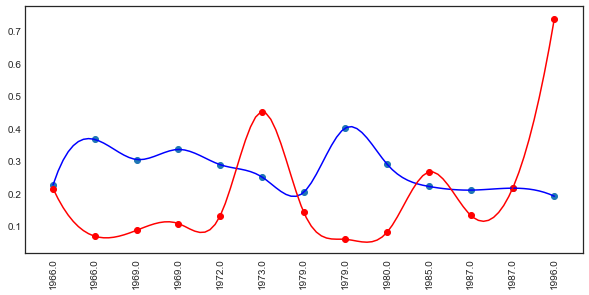

Mean length: 137852.83333333334
mean lexical diversity: 0.10068872382403225


In [8]:
dates = [book.year for book in postmodern]
x = np.arange(len(dates))
y = np.array(postmodern_lex_div)
y1 = np.array([len(book) for book in postmodern_words])
norm_y = y / np.linalg.norm(y)
norm_y1 = y1 / np.linalg.norm(y1)
xlabel = dates

f_lex = interp1d(x, norm_y, kind='cubic')
x0 = np.linspace(0,len(dates) - 1,100)
f_len = interp1d(x, norm_y1, kind='cubic')
x1 = np.linspace(0,len(dates) - 1,100)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(211)
ax.scatter(x,norm_y)
ax.scatter(x,norm_y1, color='red')
ax.plot(x0, f_lex(x0),color='blue')
ax.plot(x1, f_len(x1), color='red')
plt.xticks(x, dates, rotation='vertical')
plt.show()
print('Mean length: {}'.format(np.mean(y1[:-1])))
print('mean lexical diversity: {}'.format(np.mean(y[:-1])))

Now for the Post 9/11 stuff...

In [17]:
post911 = []

for filename in glob.glob('post911/*.txt'):
    try:
        post911.append(book.makebook(open(filename, 'r')))
    except Exception as e:
        print(book)
        
post911.sort(key=lambda x: x.year)

post911_words = []

for book in post911:
    post911_words.append(word_tokenize(book.text.strip())) # strip removes string escapes
    
post911_lex_div = []

for book in post911_words:
    post911_lex_div.append(len(set(book)) / len(book))

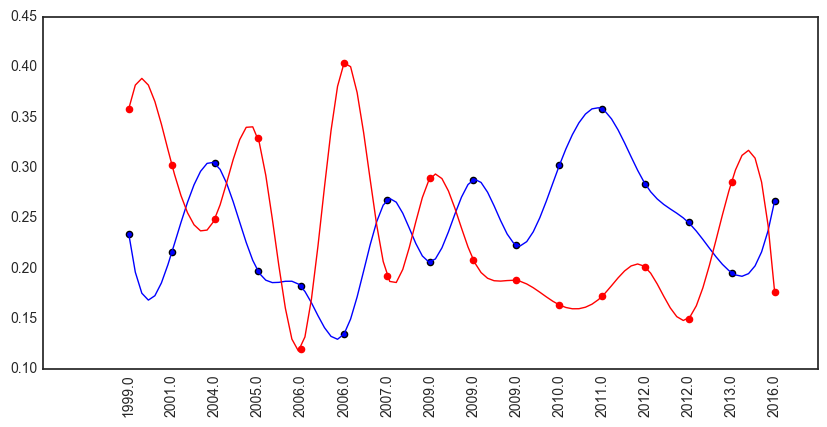

Mean length: 132505.3125
mean lexical diversity: 0.10405244238526401


In [10]:
dates1 = [book.year for book in post911]
x = np.arange(len(dates1))
y = np.array(post911_lex_div)
y1 = np.array([len(book) for book in post911_words])
norm_y = y/np.linalg.norm(y)
norm_y1 = y1/np.linalg.norm(y1)
xlabel = dates1

f_lex = interp1d(x, norm_y, kind='cubic')
x0 = np.linspace(0,len(dates1)-1,100)
f_len = interp1d(x, norm_y1, kind='cubic')
x1 = np.linspace(0,len(dates1)-1,100)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(211)
ax.scatter(x,norm_y)
ax.scatter(x,norm_y1, color='red')
ax.plot(x0, f_lex(x0), color='blue')
ax.plot(x1, f_len(x1), color='red')
plt.xticks(x, dates1, rotation='vertical')
plt.show()
print('Mean length: {}'.format(np.mean(y1)))
print('mean lexical diversity: {}'.format(np.mean(y)))